**Importing all the required libraries to load,preprocessing,analyse and train data for stroke prediction**

In [1]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline

In [2]:
import warnings
warnings.filterwarnings("ignore")

Data Loading

In [3]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Data describing

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Checking is the data set contain any null value if yes then remove that null values or fill them

In [7]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#So the bmi column contain 201 null values then fill them with average bmi

df["bmi"]=df["bmi"].fillna(df["bmi"].mean())

In [9]:
#So we filled the null valuees of the bmi column
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Dropping id column from the df

In [10]:
df = df.drop(columns=["id"])

Visualizing the data with the help of matplot and seaborn libraries

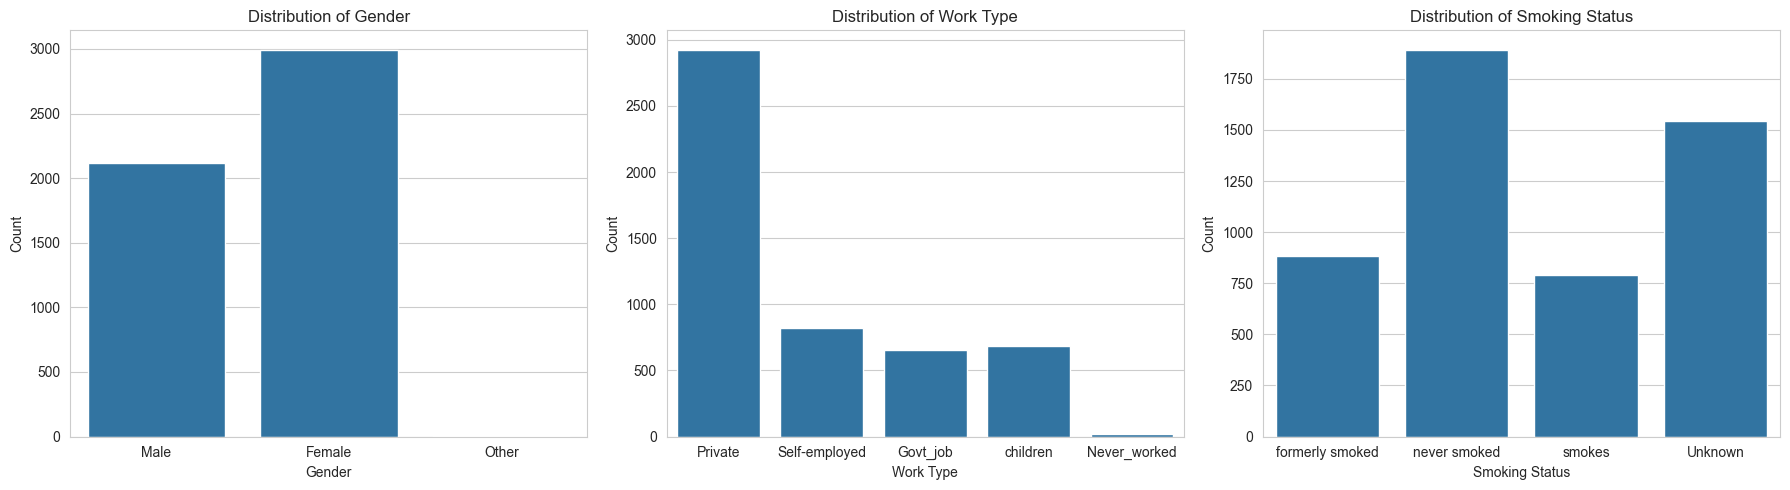

In [11]:
# Set a style for the plots
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot the distribution of `gender`
sns.countplot(x='gender', data=df, ax=axes[0])
axes[0].set_title('Distribution of Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot the distribution of `work_type`
sns.countplot(x='work_type', data=df, ax=axes[1])
axes[1].set_title('Distribution of Work Type')
axes[1].set_xlabel('Work Type')
axes[1].set_ylabel('Count')

# Plot the distribution of `smoking_status`
sns.countplot(x='smoking_status', data=df, ax=axes[2])
axes[2].set_title('Distribution of Smoking Status')
axes[2].set_xlabel('Smoking Status')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot the distribution of `age`
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')

# Plot the distribution of `avg_glucose_level`
sns.histplot(df['avg_glucose_level'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Average Glucose Level')

# Plot the distribution of `bmi`
sns.histplot(df['bmi'].dropna(), bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of BMI')

plt.tight_layout()
plt.show()

What is the relationship between different variables and the stroke outcome?

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Age vs Stroke
sns.boxplot(x='stroke', y='age', data=df, ax=axes[0])
axes[0].set_title('Age vs. Stroke')

# Hypertension vs Stroke
sns.countplot(x='hypertension', hue='stroke', data=df, ax=axes[1])
axes[1].set_title('Hypertension vs. Stroke')

# Smoking Status vs Stroke
sns.countplot(x='smoking_status', hue='stroke', data=df, ax=axes[2])
axes[2].set_title('Smoking Status vs. Stroke')
axes[2].tick_params(axis='x', rotation=45)  # rotate labels if they overlap

plt.tight_layout()
plt.show()

Checkking correlation

In [ ]:
# keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

Droping the few rows from gender which containing other

In [ ]:
df = df[df['gender'] != 'Other']

Encoding for the categorical columns

In [ ]:
# Remove 'Other' first
df = df[df['gender'] != 'Other']

# Then label encoding
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})
df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})
df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban': 1})

# One-hot encoding
categorical_cols = ['work_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_cols, dtype=int)


In [ ]:
#Calling numerical columns
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

#STD calling
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
print(df_encoded.head().to_markdown(index=False, numalign='left', stralign='left'))

Saving encoded data to df by overriding method

In [ ]:
df=df_encoded

In [ ]:
df

Here we can clearly see that the oversampling is required

In [ ]:
df["stroke"].value_counts()

Spliting the data into x and y as input and output

In [ ]:
#for input
x=df.drop("stroke",axis=1)

#for output
y=df["stroke"]

Calling the oversampler form the imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

over_sample model calliing

In [ ]:
ro=RandomOverSampler()

In [ ]:
x_resample,y_resample=ro.fit_resample(x,y)

Now if we check the value count of target column it's fixed

In [ ]:
y_resample.value_counts()

Spliting the x_resample and y_resample into train_test part

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=42)

Model calling and defining them in dictinary

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

Training,Evaluating & Tracking Best Model

In [ ]:
best_model_name = None
best_score = -np.inf
best_pipeline = None

Using for loop evalusting and traking best model

In [ ]:
for name, clf in models.items():
    pipeline = Pipeline(steps=[
        ("classifier", clf)
    ])

    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1] if hasattr(clf, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else 0.0

    print(f"\n📊 {name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc:.4f}")

    # Use ROC-AUC to pick best (better for imbalance)
    if acc > best_score:
        best_score = acc
        best_model_name = name
        best_pipeline = pipeline


In [ ]:
import joblib

#Saving Best Model
model_filename = "stroke_prediction_best_model.pkl"

#Using joblib.dump() to save the best_pipeline
joblib.dump(best_pipeline, model_filename)

print(f"\n✅ Best Model: {best_model_name} (Accuracy = {best_score:.4f}) saved as {model_filename}")